# PREDICT DIABETIC OR NOT 

In [1]:
# Pima Indians Diabetes dataset is used in this modelling - Predict whether the patient wil have diabetes or not 

In [2]:
# IMPORT LIBRARIES

In [3]:
import numpy as np # linear algebra
import pandas as pd  # data processing ,I/O
import matplotlib.pyplot as plt # plots data 
%matplotlib inline 

import seaborn as sns

In [4]:
df = pd.read_csv("pima-indians-diabetes.csv")

In [5]:
df.shape

(768, 9)

In [6]:
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.isnull().values.any()

False

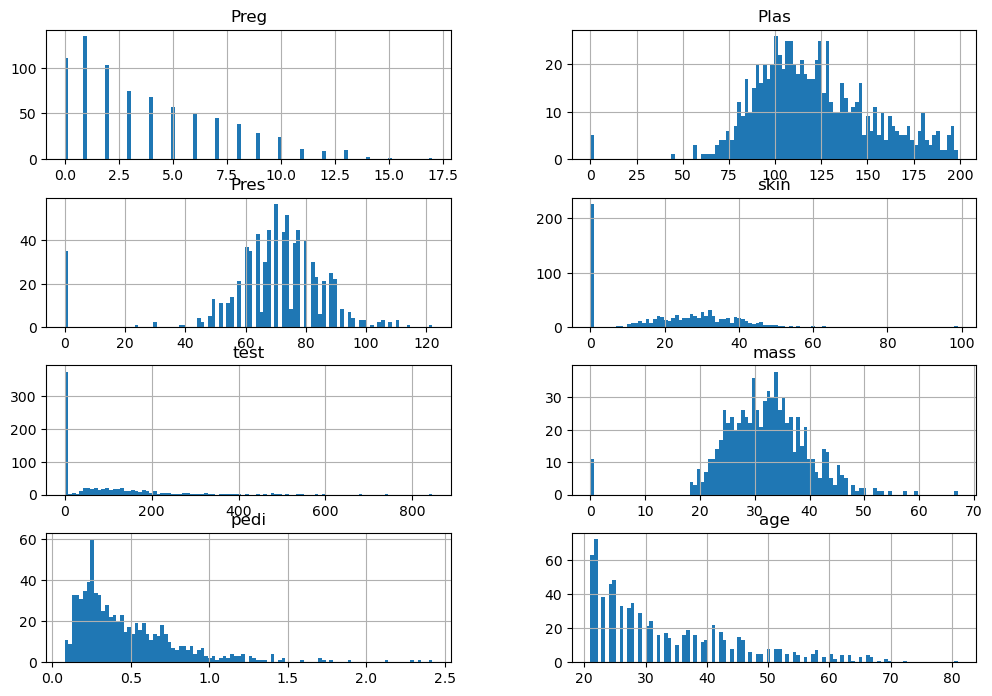

In [8]:
columns = list(df)[0:-1]
df[columns].hist(bins=100,figsize=(12,30),layout=(14,2));

In [9]:
# IDENTIFY CORRELATION IN DATA

In [10]:
df.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [11]:
# HEATMAP OF CORREALATION

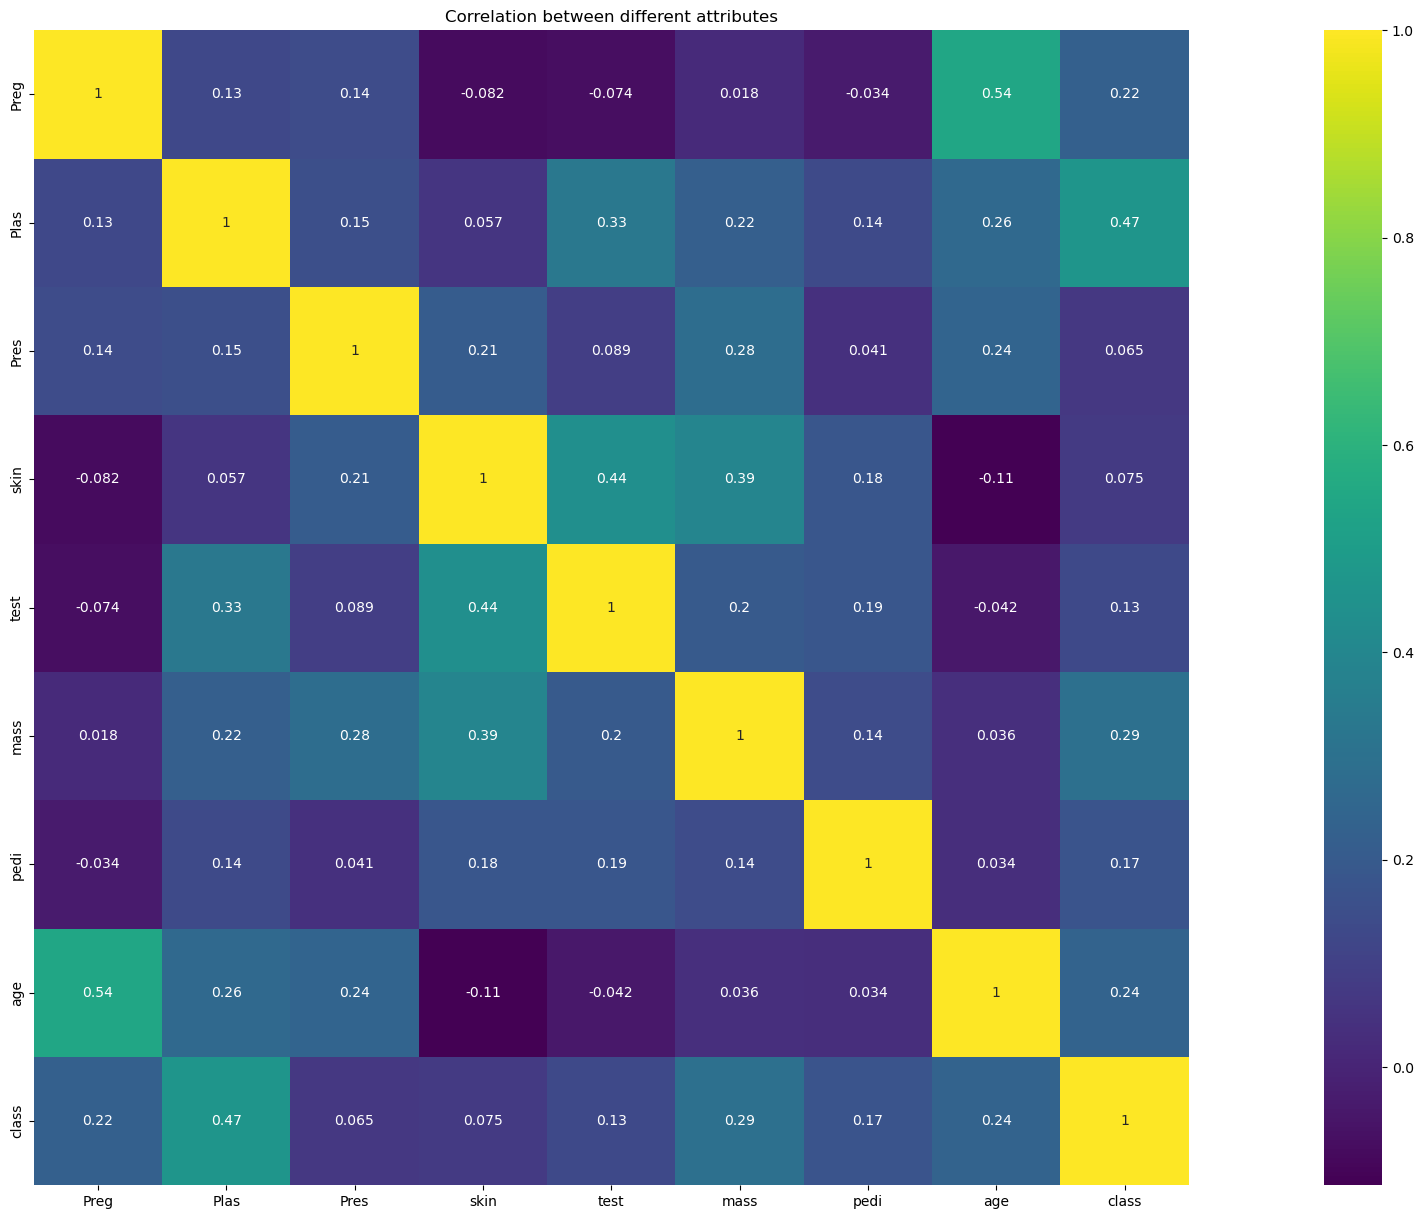

In [12]:
plt.figure(figsize=(35,15))

sns.heatmap(df.corr(),vmax=1,square=True,annot=True,cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

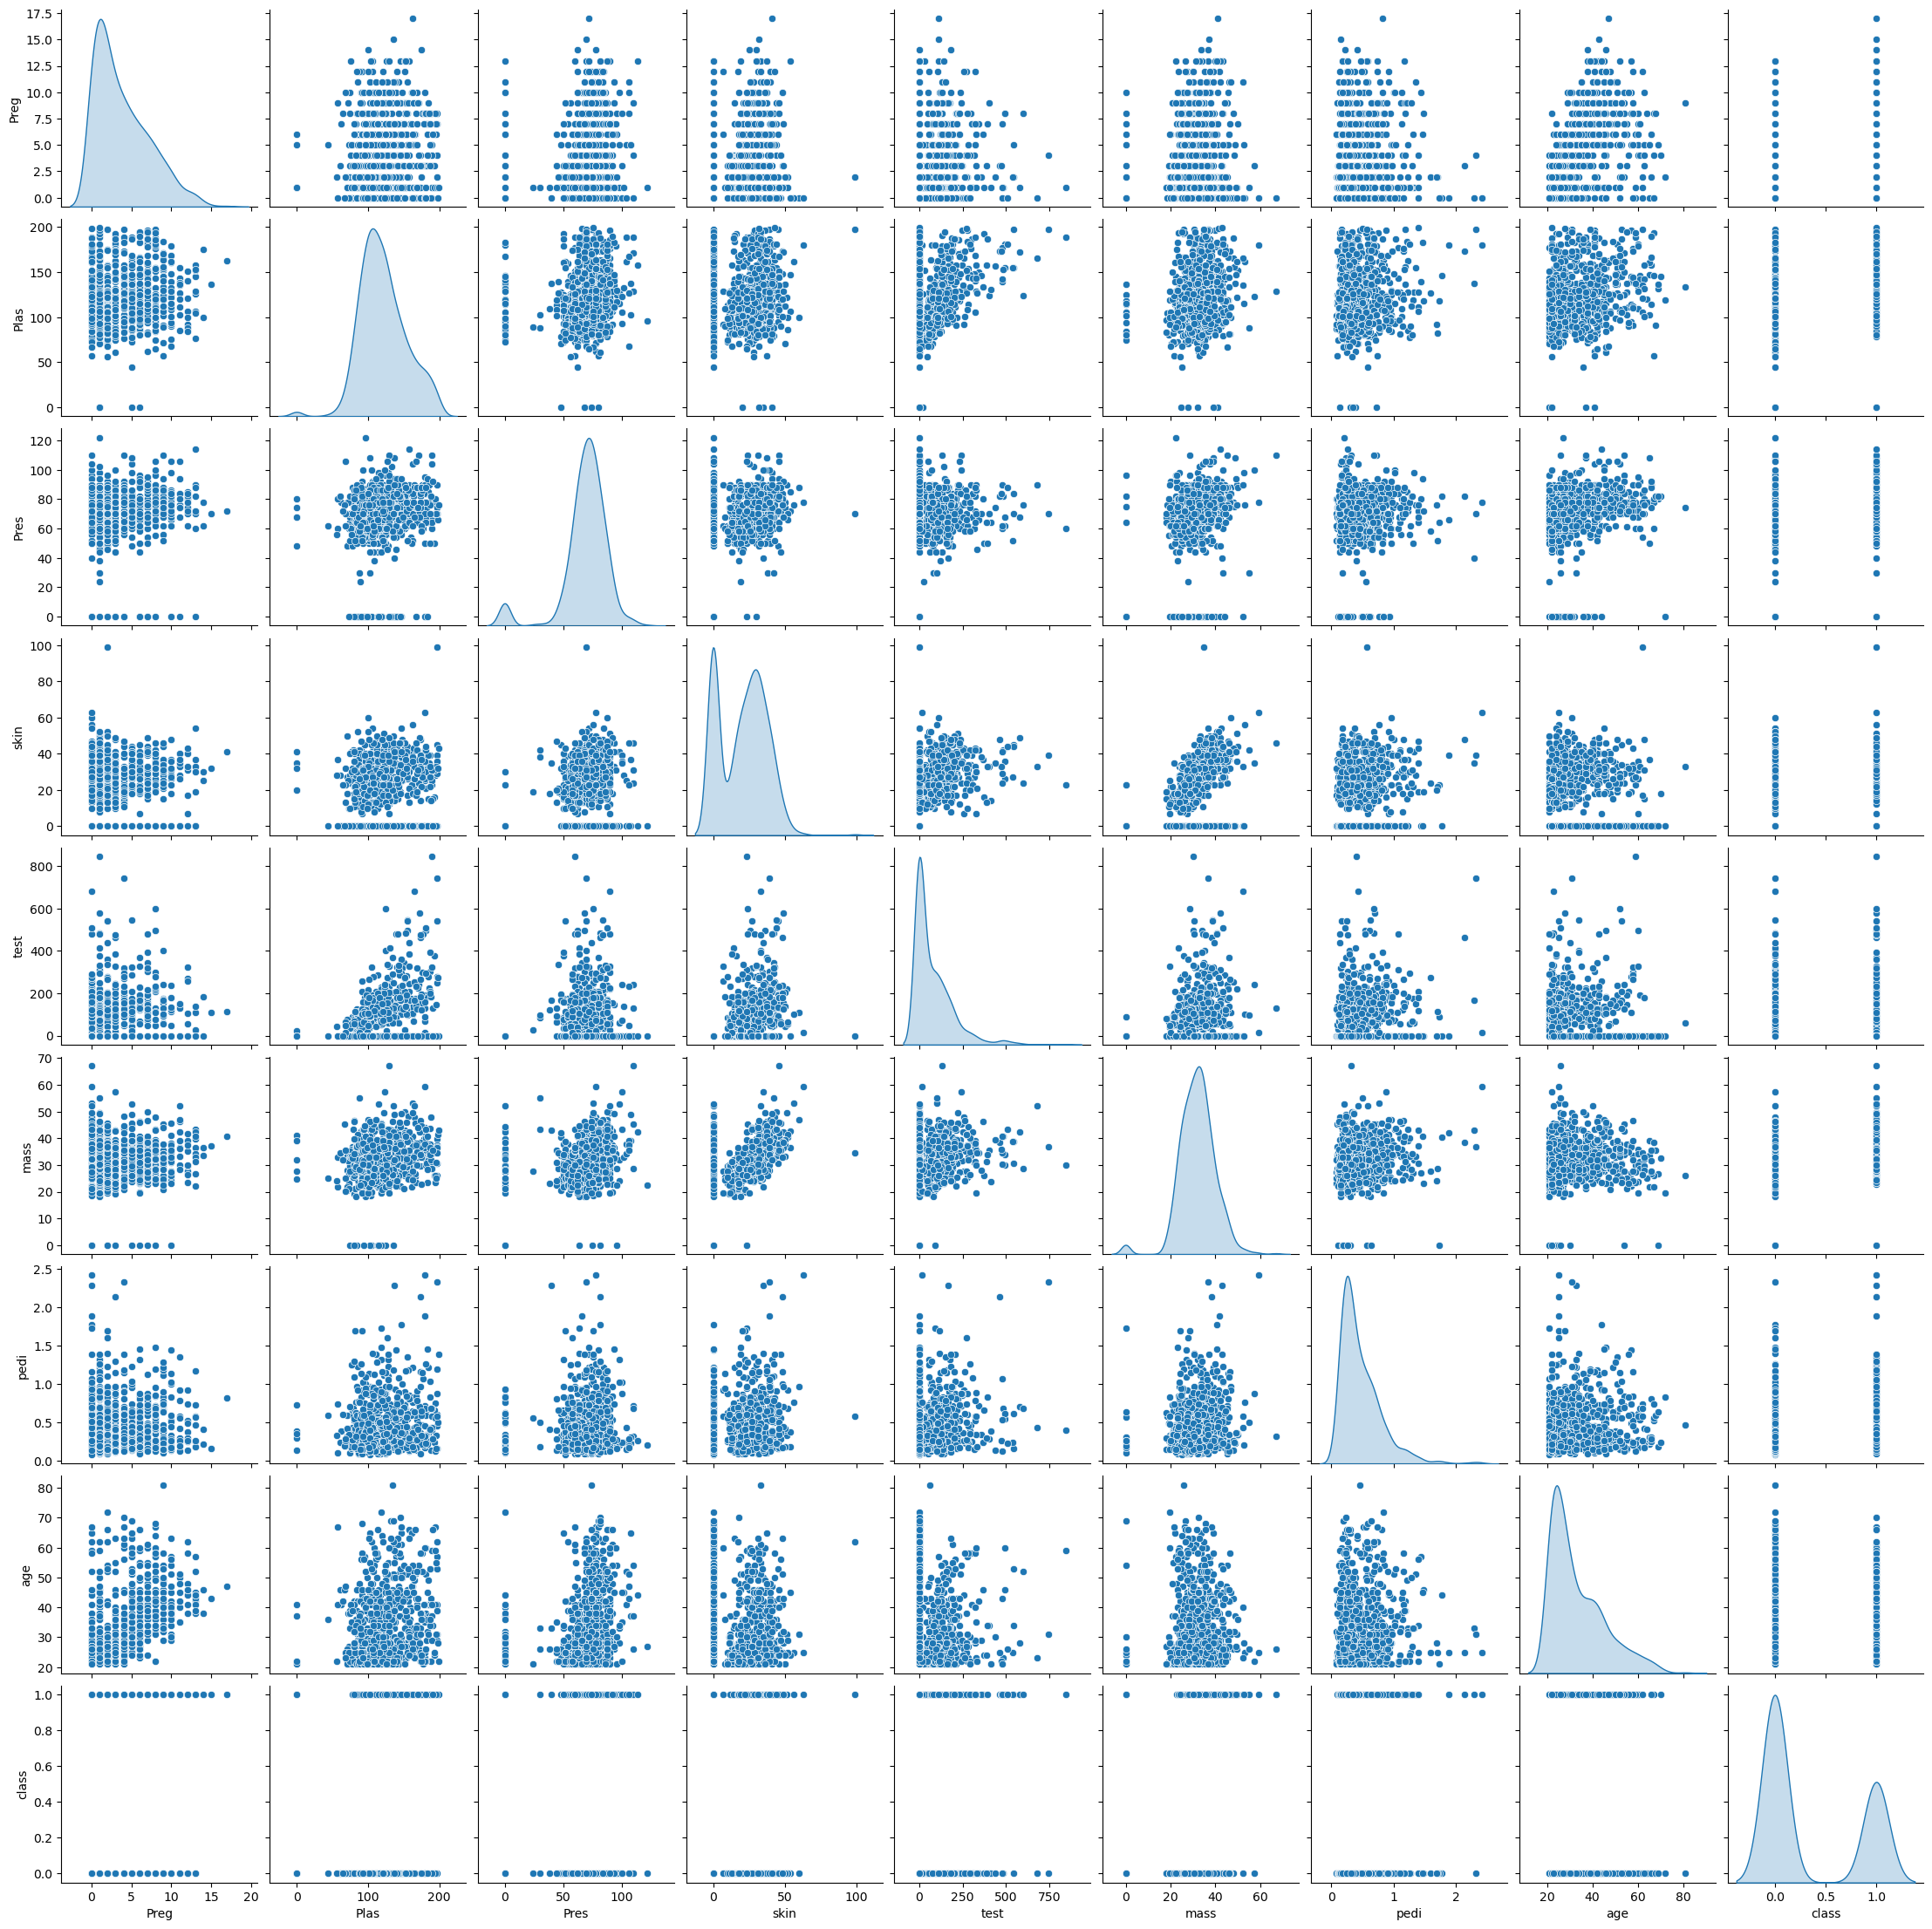

In [13]:
sns.pairplot(df,diag_kind='kde')

In [14]:
# CHECKING FOR DATA IMBALANCE

In [15]:
df['class'].value_counts()

class
0    500
1    268
Name: count, dtype: int64

In [16]:
# SPLITTING DATA

In [17]:
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
from sklearn.model_selection import train_test_split

x = df.drop('class',axis=1)
y = df['class']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [19]:
x_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29


In [20]:
x_test.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
285,7,136,74,26,135,26.0,0.647,51
101,1,151,60,0,0,26.1,0.179,22
581,6,109,60,27,0,25.0,0.206,27
352,3,61,82,28,0,34.4,0.243,46
726,1,116,78,29,180,36.1,0.496,25


In [21]:
# SPLIT OF DATA 
print("The percent of data used for training is {}".format((len(x_train)/len(df))*100))
print("The percent of data used for testing is {}".format((len(x_test)/len(df))*100))

The percent of data used for training is 69.921875
The percent of data used for testing is 30.078125


In [22]:
# DATA PREPARATION 

In [23]:
x_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29


In [24]:
# Lots of zeros in the dataset !!! They need to be replaced with mean

In [25]:
from sklearn.impute import SimpleImputer 
rep_0 = SimpleImputer(missing_values=0,strategy="mean")

cols = x_train.columns

x_train = pd.DataFrame(rep_0.fit_transform(x_train))
x_test = pd.DataFrame(rep_0.fit_transform(x_test))

In [26]:
x_train.head()

,0,1,2,3,4,5,6,7
0,15.000000,136.0,70.0,32.0,110.000000,37.1,0.153,43.0
1,4.396514,97.0,64.0,36.0,100.000000,36.8,0.600,25.0
2,1.000000,116.0,70.0,28.0,158.243346,27.4,0.204,21.0
3,2.000000,106.0,64.0,35.0,119.000000,30.5,1.400,34.0
4,4.396514,123.0,88.0,37.0,158.243346,35.2,0.197,29.0


In [27]:
# REPLACE COLUMN NAMES 

x_train.columns = cols
x_test.columns = cols

In [28]:
x_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,15.000000,136.0,70.0,32.0,110.000000,37.1,0.153,43.0
1,4.396514,97.0,64.0,36.0,100.000000,36.8,0.600,25.0
2,1.000000,116.0,70.0,28.0,158.243346,27.4,0.204,21.0
3,2.000000,106.0,64.0,35.0,119.000000,30.5,1.400,34.0
4,4.396514,123.0,88.0,37.0,158.243346,35.2,0.197,29.0


In [29]:
# NAIVE MODEL 

In [30]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [31]:
# PERFORMANCE OF OUR MODEL WITH TRAINING DATA

In [32]:
x_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,15.000000,136.0,70.0,32.0,110.000000,37.1,0.153,43.0
1,4.396514,97.0,64.0,36.0,100.000000,36.8,0.600,25.0
2,1.000000,116.0,70.0,28.0,158.243346,27.4,0.204,21.0
3,2.000000,106.0,64.0,35.0,119.000000,30.5,1.400,34.0
4,4.396514,123.0,88.0,37.0,158.243346,35.2,0.197,29.0


In [33]:
train_prediction = model.predict(x_train)
train_prediction

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [34]:
from sklearn import metrics 

print("Model accuracy :{0:.4f}".format(metrics.accuracy_score(y_train,train_prediction)))

Model accuracy :0.7393


In [35]:
x_test.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,7.0,136.0,74.0,26.00,135.000000,26.0,0.647,51.0
1,1.0,151.0,60.0,30.16,150.137405,26.1,0.179,22.0
2,6.0,109.0,60.0,27.00,150.137405,25.0,0.206,27.0
3,3.0,61.0,82.0,28.00,150.137405,34.4,0.243,46.0
4,1.0,116.0,78.0,29.00,180.000000,36.1,0.496,25.0


In [36]:
test_predict = model.predict(x_test)
test_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [37]:
from sklearn import metrics 

print("Model accuracy :{0:.4f}".format(metrics.accuracy_score(y_test,test_predict)))

Model accuracy :0.7706


In [38]:
# CONFUSION MATRIX AND CLASSIFICATION REPORT 

Confusion Matrix


<Axes: >

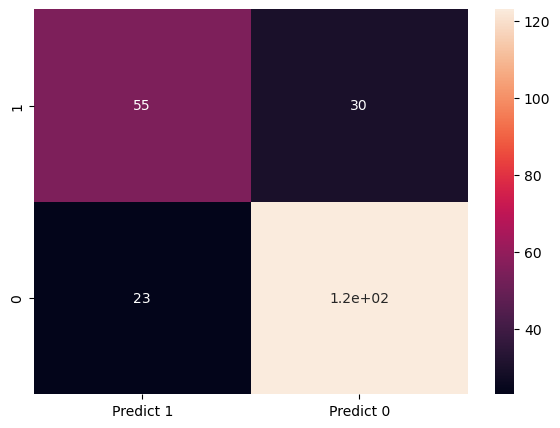

In [39]:
print("Confusion Matrix")
cm = metrics.confusion_matrix(y_test,test_predict,labels=[1,0])

df_cm = pd.DataFrame(cm,index=[i for i in ["1","0"]],
                    columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True)

In [40]:
from sklearn.metrics import classification_report

print("Classification report")
print(metrics.classification_report(y_test,test_predict,labels=[1,0]))
# We can see that true positive numbers with value 1 id of precision and recall id below 70%

Classification report
              precision    recall  f1-score   support

           1       0.71      0.65      0.67        85
           0       0.80      0.84      0.82       146

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231

